In [1]:
import numpy as np
import pandas as pd
from functions import *
from schemes import *
from plot import * 
from Kepler import *
from adaptive import *
from FRSolver import * 

%matplotlib inline

In [2]:
# gravity
G = 1

m1 = 1 
m2 = 1 
m3 = 1

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")
r3 = np.array([-1,0.0,0.0], dtype="float64")

p1 = 0.347111
p2 = 0.532728

# velocity 
v1 = np.array([-2 * p1,-2*p2,0], dtype="float64")
v2 = np.array([p1,p2,0], dtype="float64")
v3 = np.array([p1,p2,0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2,r3])
v0s = np.array([v1,v2,v3])

masses = np.array([m1, m2, m3])

In [3]:
E0 = TotalEnergy(r0s,v0s,G,masses)
pxhat = p1 + 0.05
pyhat = p2 + 0.05

# velocity 
v1hat = np.array([pxhat,pyhat,0], dtype="float64")
v2hat = np.array([-2 * pxhat,-2*pyhat,0], dtype="float64")
v3hat = np.array([pxhat,pyhat,0], dtype="float64")
v0shat = np.array([v1hat,v2hat,v3hat])

R = findR(v0shat, E0, masses)

# position
r1hat = np.array([-R,0.0,0.0], dtype="float64")
r2hat = np.array([0,0.0,0.0], dtype="float64")
r3hat = np.array([R,0.0,0.0], dtype="float64")
r0shat = np.array([r1hat,r2hat,r3hat])

In [4]:
T = 1000
C = 0.5
traj, stability = fullSolver(T, C, r0s, v0s, G, masses)
traj2, stability = fullSolver(T, C, r0shat, v0shat, G, masses)

In [5]:
print(stability)

1


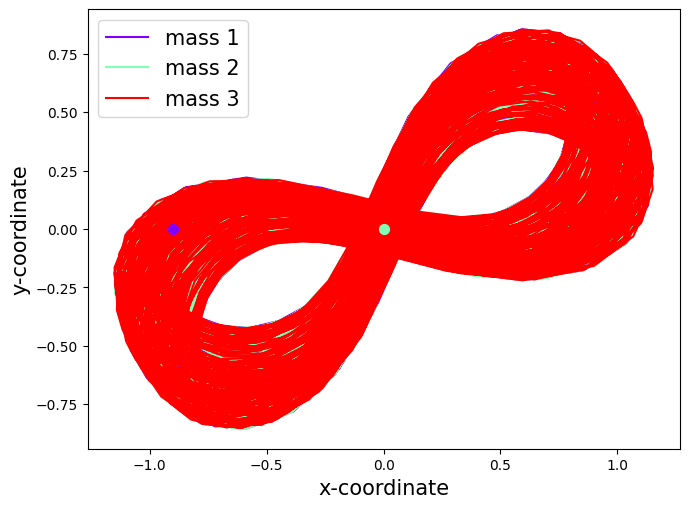

In [6]:
PlotOrbits(traj2)

In [7]:
def distCalculator(rs):
    N = len(rs)
    Rs = []
    for i in range(N):
        for j in range(i + 1, N):
            Rs.append(np.linalg.norm(rs[i] - rs[j]))
    Rs = np.array(Rs)
    return Rs[:-1] / np.sum(Rs)

def fillGrid(path, gridsize = 1000):
    grid = np.zeros((gridsize, gridsize))

    for pos in path:

        grid_x = int(2 * (pos[0] - 1e-15) * gridsize)
        grid_y = int(2 * (pos[1] - 1e-15) * gridsize)

        grid[grid_x][grid_y] = 1

    return grid

In [8]:
pos = np.array([distCalculator(rs) for rs in traj[1]])
pos2 = np.array([distCalculator(rs) for rs in traj2[1]])

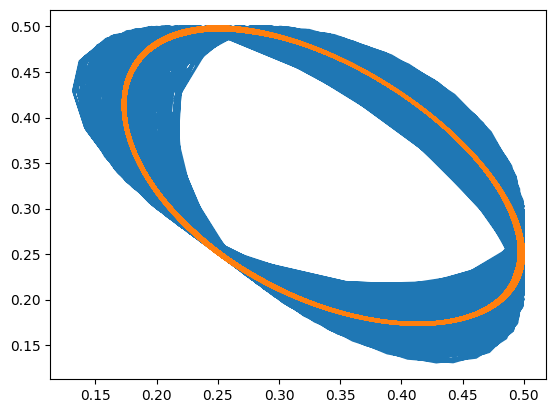

In [9]:
plt.plot(pos2[:,0], pos2[:,1])
plt.plot(pos[:,0], pos[:,1])

In [19]:
gs = 100
grid = fillGrid(pos, gridsize=gs)
grid2 = fillGrid(pos2, gridsize=gs)

[Text(0, 0.5, '0.5'),
 Text(0, 9.5, '0.45'),
 Text(0, 19.5, '0.4'),
 Text(0, 29.5, '0.35'),
 Text(0, 39.5, '0.3'),
 Text(0, 49.5, '0.25'),
 Text(0, 59.5, '0.2'),
 Text(0, 69.5, '0.15'),
 Text(0, 79.5, '0.1'),
 Text(0, 89.5, '0.05'),
 Text(0, 99.5, '0.0')]

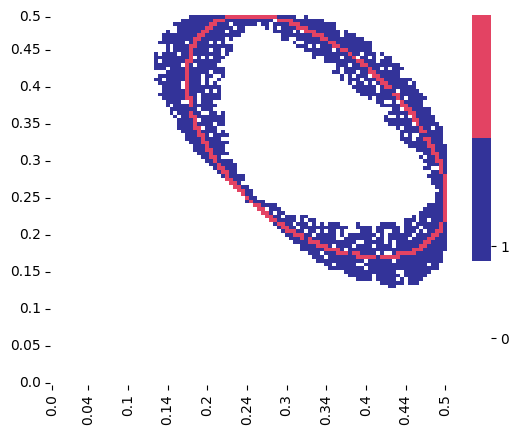

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots()

grid2prime = grid2 - grid

comb_grid = grid2prime + 2 * grid 


colors = ['#00204C', 'green', '#FDE724']  # Define the colors for each level
colors = ['white', 'navy', 'crimson']
cmap = ListedColormap(colors)

sns.heatmap(np.flipud(comb_grid), cmap = cmap, ax = ax, cbar = True, alpha = .8)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks(np.array([0.25,0.75]))
colorbar.set_ticklabels([0,1])

positions = np.linspace(0,1,gs, endpoint= False) * 0.5
# Determine the tick positions
num_ticks = 11
tick_positions = np.linspace(0, positions.shape[0] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positions + 0.5)
ax.set_yticks(tick_positions + 0.5)
ax.set_xticklabels(np.round(positions,2)[tick_positions])
ax.set_yticklabels(np.flip(np.round(positions,2))[tick_positions])

In [21]:
print(np.sum(grid))
print(np.sum(grid2))

249.0
1650.0


In [12]:
stability, variance, maxE, maxT = shapeSolver(T, C, r0s, v0s, G, masses)
stability2, variance2, maxE2, maxT2 = shapeSolver(T, C, r0shat, v0shat, G, masses)

In [22]:
print('variance', variance)
print('variance 2', variance2)

variance 1952.0
variance 2 5104.0


In [32]:
exs = np.linspace(-0.3,0.4,40)
eys = np.flip(np.linspace(-0.2, 0.2, 20))

In [33]:
T = 1000
C = 0.4

In [41]:
E0 = np.sum(TotalEnergy(r0s, v0s, G, masses))

stabilities = []
ts = []
Es = []
variances = []
for ex in exs:
    for ey in eys:
        print(ex, ey)
        pxhat = p1 + ex
        pyhat = p2 + ey

        # velocity 
        v1hat = np.array([pxhat,pyhat,0], dtype="float64")
        v2hat = np.array([-2 * pxhat,-2*pyhat,0], dtype="float64")
        v3hat = np.array([pxhat,pyhat,0], dtype="float64")
        v0shat = np.array([v1hat,v2hat,v3hat])

        R = findR(v0shat, E0, masses)
        
        # position
        r1hat = np.array([-R,0.0,0.0], dtype="float64")
        r2hat = np.array([0,0.0,0.0], dtype="float64")
        r3hat = np.array([R,0.0,0.0], dtype="float64")
        r0shat = np.array([r1hat,r2hat,r3hat])
        

        stability, variance, maxE, maxT = shapeSolver(T, C, r0shat, v0shat, G, masses)

        variances.append(variance)
        stabilities.append(stability)
        ts.append(maxT)
        Es.append(maxE)

stabilities = np.array(stabilities).reshape(len(exs), len(eys))
Es = np.array(stabilities).reshape(len(exs), len(eys))
ts = np.array(ts).reshape(len(exs), len(eys))
variances = np.array(variances).reshape(len(exs), len(eys))

-0.4 0.2
-0.4 0.17894736842105263
-0.4 0.15789473684210525
-0.4 0.13684210526315788
-0.4 0.1157894736842105
-0.4 0.09473684210526312
-0.4 0.0736842105263158
-0.4 0.05263157894736842
-0.4 0.03157894736842104
-0.4 0.010526315789473661
-0.4 -0.01052631578947369
-0.4 -0.03157894736842107
-0.4 -0.052631578947368446
-0.4 -0.0736842105263158
-0.4 -0.09473684210526317
-0.4 -0.11578947368421054
-0.4 -0.1368421052631579
-0.4 -0.15789473684210528
-0.4 -0.17894736842105263
-0.4 -0.2
-0.3794871794871795 0.2
-0.3794871794871795 0.17894736842105263
-0.3794871794871795 0.15789473684210525
-0.3794871794871795 0.13684210526315788
-0.3794871794871795 0.1157894736842105
-0.3794871794871795 0.09473684210526312
-0.3794871794871795 0.0736842105263158
-0.3794871794871795 0.05263157894736842
-0.3794871794871795 0.03157894736842104
-0.3794871794871795 0.010526315789473661
-0.3794871794871795 -0.01052631578947369
-0.3794871794871795 -0.03157894736842107
-0.3794871794871795 -0.052631578947368446
-0.37948717948717

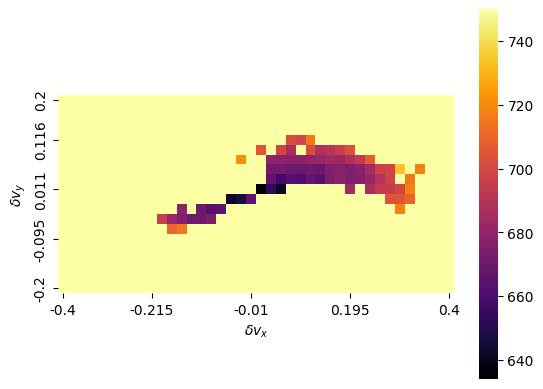

In [46]:
import seaborn as sns
from matplotlib.colors import ListedColormap


# Create a figure and axis for the heatmap
fig, ax = plt.subplots()

# Create the heatmap using Seaborn
sns.heatmap(variances.T,cmap = 'inferno',  cbar=True, ax=ax, vmax = 750)

# Determine the tick positions
num_ticks = 5
tick_positionsx = np.linspace(0, variances.shape[0] - 1, num_ticks, dtype=int) 
tick_positionsy = np.linspace(0, variances.shape[1] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positionsx + 0.5)
ax.set_yticks(tick_positionsy + 0.5)
ax.set_xticklabels(np.round(exs,3)[tick_positionsx])
ax.set_yticklabels(np.round(eys,3)[tick_positionsy])

# Set axis labels and title
ax.set_xlabel(f'$\delta v_x$')
ax.set_ylabel('$\delta v_y$')

# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks(0.375 * np.array([1, 3, 5, 7]))
# colorbar.set_ticklabels(['$d > 10$', '$T > {1000}}$', '$h < 0.001$', '$E > 0.01$'])

ax.set_aspect('equal')
# Show the plot
plt.show()